In [1]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
from kuramoto1 import Kuramoto
from scipy import stats 

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/dominicburrows/anaconda3/lib/python3.7/_collectio

In [2]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
kslist = sorted(glob.glob('*_ks*'))
kslist

['_param_ks.npy']

## Plot parameter sweep

#### KS distance map 

In [58]:
shape = (200)
count=0
ks_sum = np.zeros((shape))
for i in range(shape):
    ks_vec = []
    for t in range(len(np.load(kslist[0]))):
        ks_vec = np.append(ks_vec, np.load(kslist[0])[t][i][0])
        ks_sum[i] = np.sum(ks_vec)/len(ks_vec) 

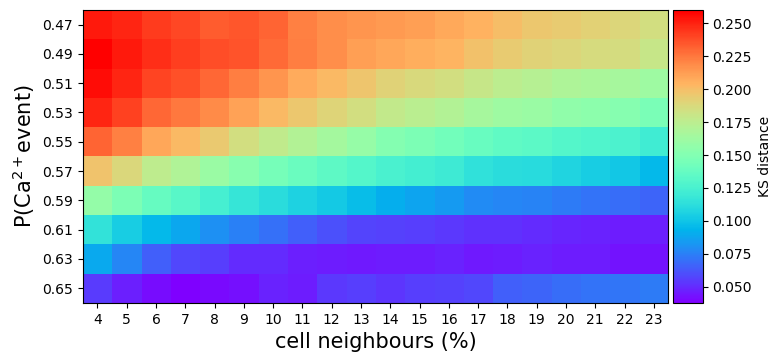

In [59]:
#KS distance
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
    
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(ks_sum.shape[0]/nnbs)
ks_av = ks_sum.reshape((bcls,nnbs))    
plot1 = ax.imshow(ks_av, cmap = 'rainbow')#, norm = divnorm)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'KS distance')
plt.show()

In [54]:
shape = (200)
count=0
p_sum = np.zeros((shape))
for i in range(shape):
    p_vec = []
    for t in range(len(np.load(kslist[0]))):
        p_vec = np.append(p_vec, np.load(kslist[0])[t][i][1])
        p_sum[i] = np.sum(p_vec < 0.05)/len(p_vec) 

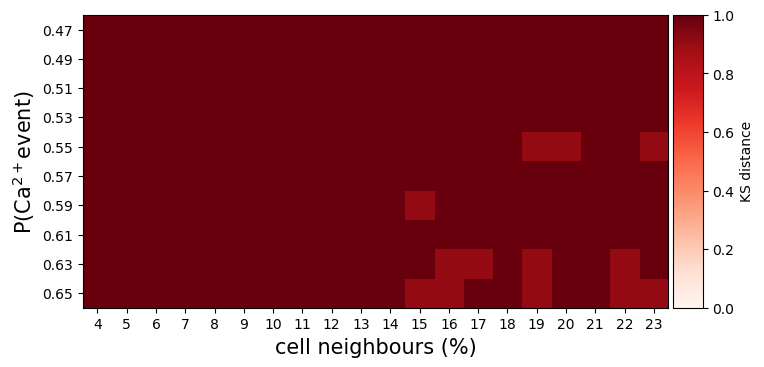

In [57]:
#p value
from mpl_toolkits.axes_grid1 import make_axes_locatable
#divnorm = colors.DivergingNorm(vmin=np.min(expsum), vcenter=3.4, vmax=np.max(expsum))
xlist = list(range(21))
for i in range(len(xlist)):
    xlist[i] = str(np.int(np.linspace(3,23, 21)[i]))
    
f, ax = plt.subplots(figsize = (8,5))
nnbs = 20
bcls = np.int(p_sum.shape[0]/nnbs)
p_av = p_sum.reshape((bcls,nnbs))    
plot1 = ax.imshow(p_av, cmap = 'Reds', vmin = 0, vmax = 1)
ax.set_xlabel('cell neighbours (%)', size = '15')
ax.set_ylabel('P(Ca$^{2+}$event)', size = '15')
ax.locator_params(axis='y', nbins=10)
ax.locator_params(axis='x', nbins=20)
ax.set_xticklabels(xlist, fontsize = 10)
ax.set_yticklabels(adfn.name_zero('back', 0.45, 0.65, 0.02), fontsize = 10)
divider = make_axes_locatable(ax)
cax0 = divider.append_axes("right", size="5%", pad=0.05)
cbar0 = f.colorbar(plot1, cax=cax0, label = 'KS distance')
plt.show()

#### Exponent change map

#### Branching ratio change map

## Baseline - PTZ ccdf

In [3]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
p5list = sorted(glob.glob('*PTZ05*_av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))
p5list

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_PTZ05_run-01_av.npy']

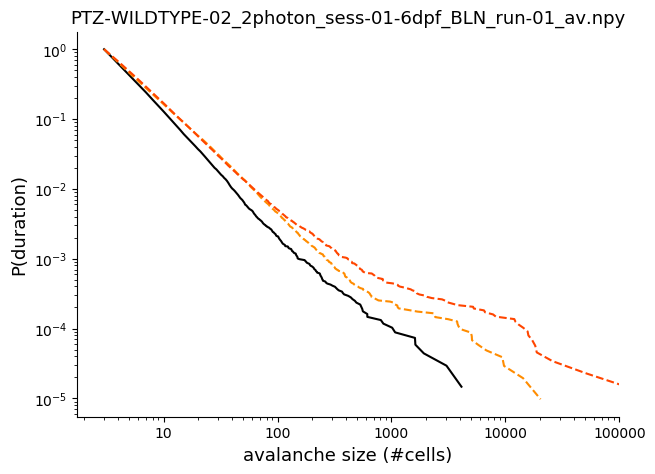

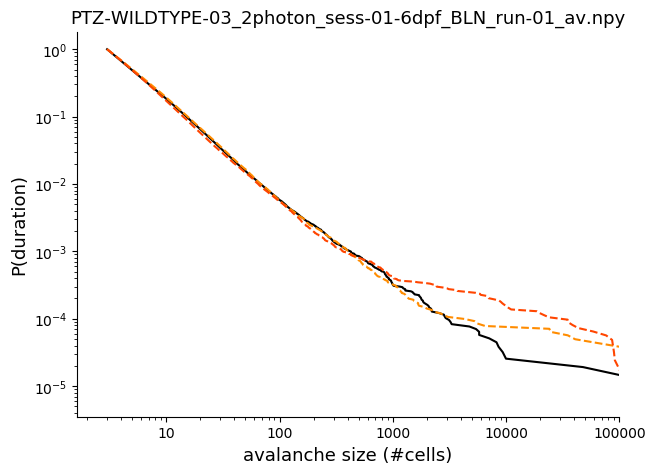

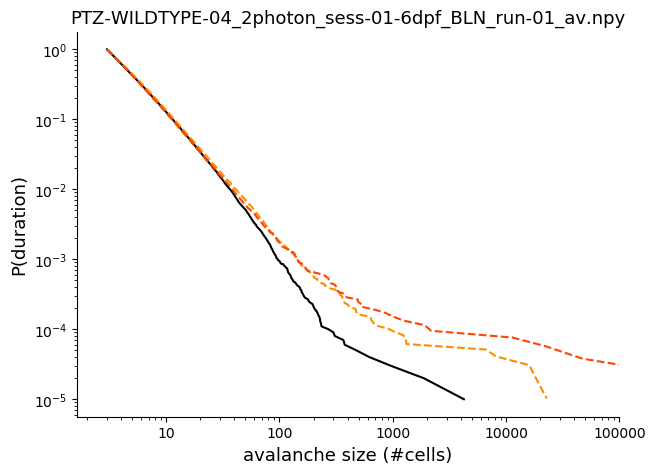

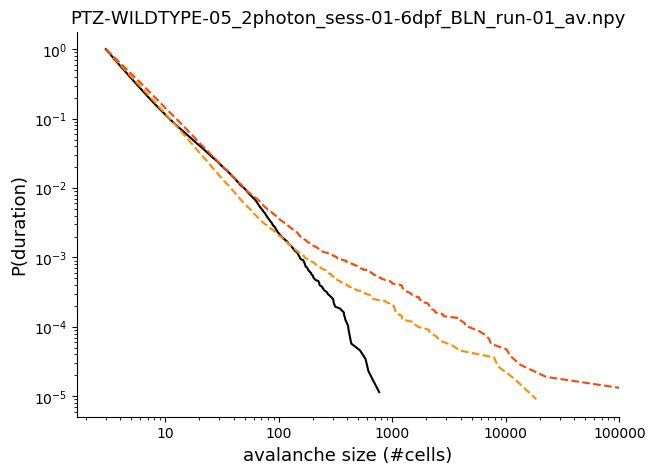

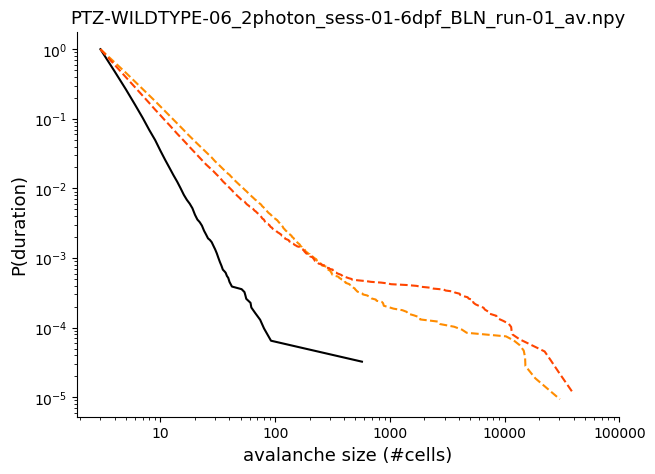

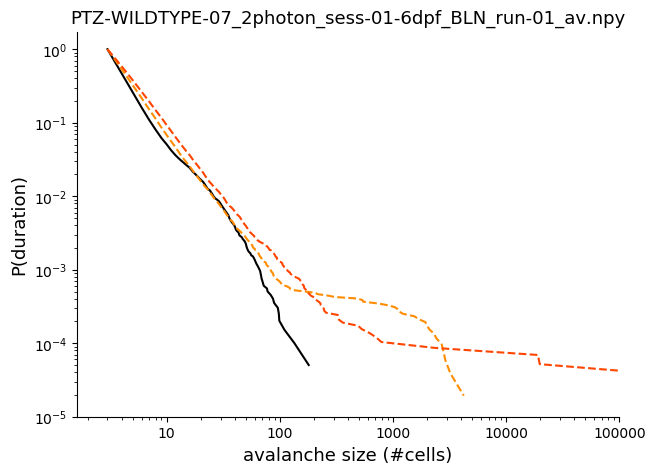

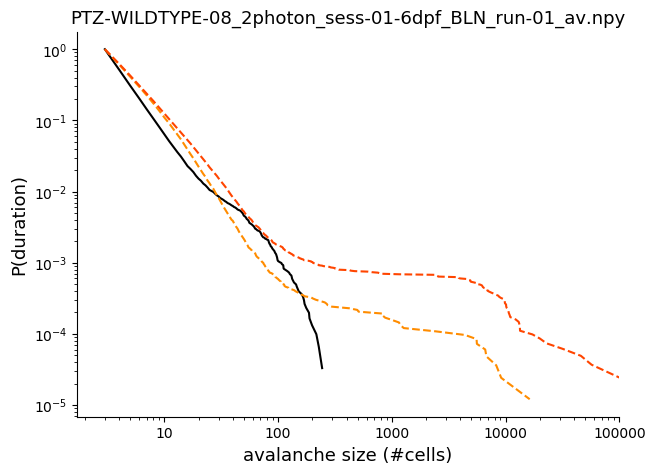

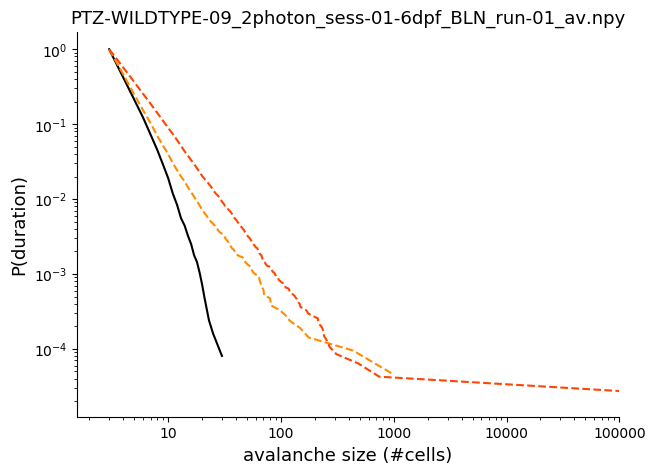

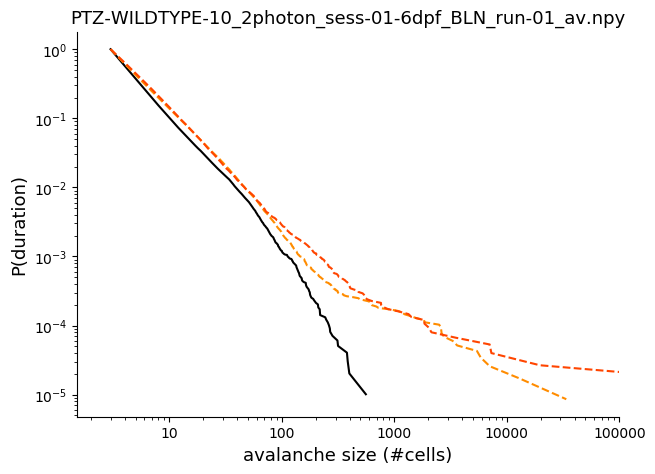

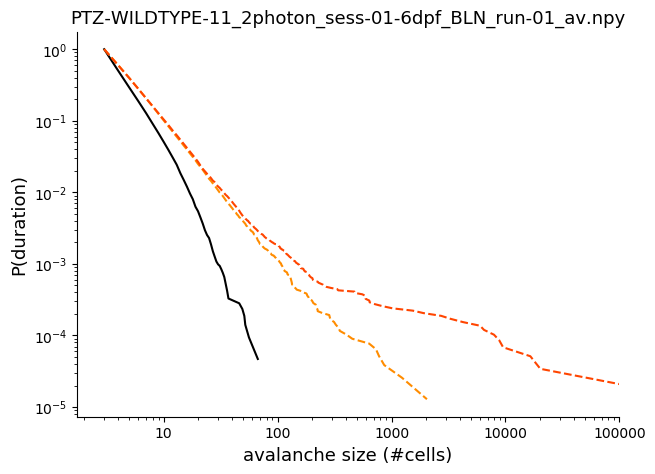

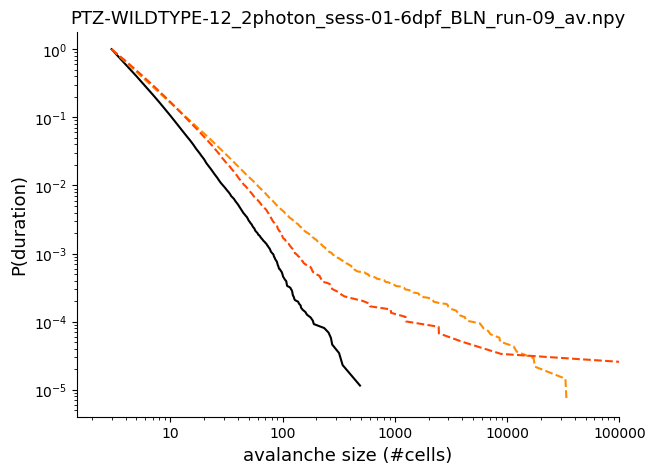

In [4]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','orangered']
lines = ['-', '--', '--']
choose=0
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
    p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_av.npy*'))
    p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
    plotlist = [blnlist,p5list,p20list]
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(plotlist)):
        avdistcut = np.load(plotlist[e][0])[choose]
        powerlaw.plot_ccdf(avdistcut, linestyle = lines[e],linewidth =1.5 , markersize = 1, alpha = 1, c = colors[e])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 100000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(duration)', size = '13')
    axarr.set_xlabel('avalanche size (#cells)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

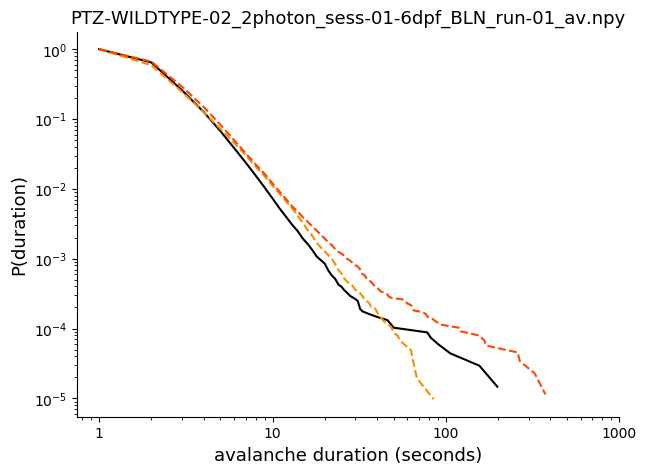

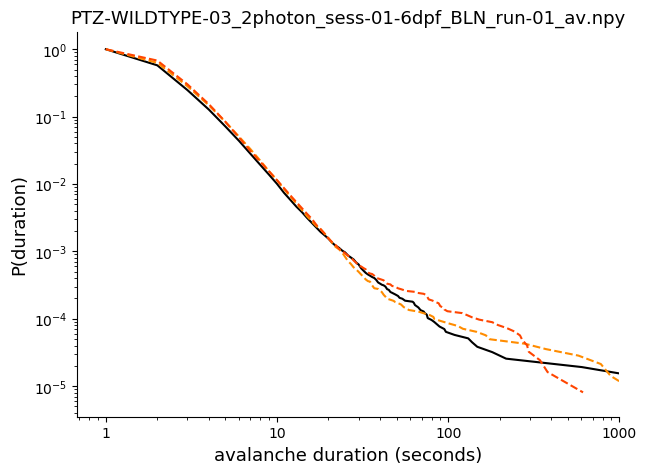

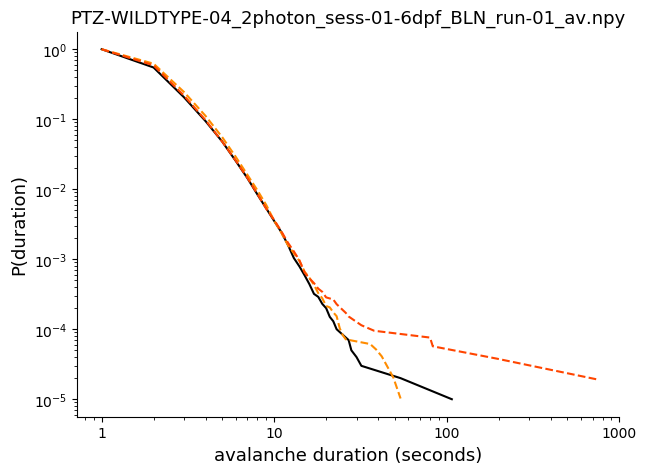

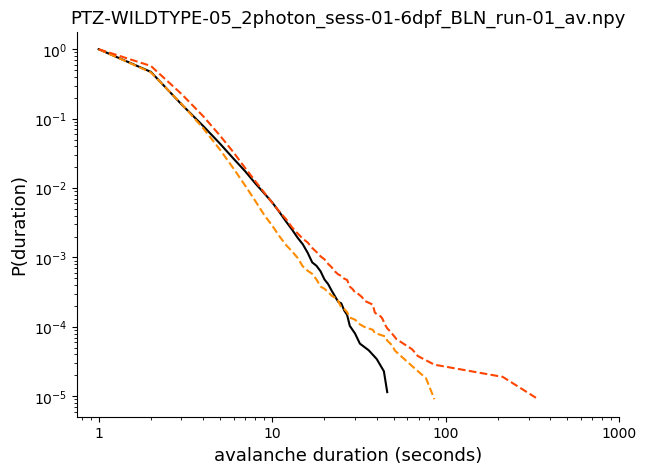

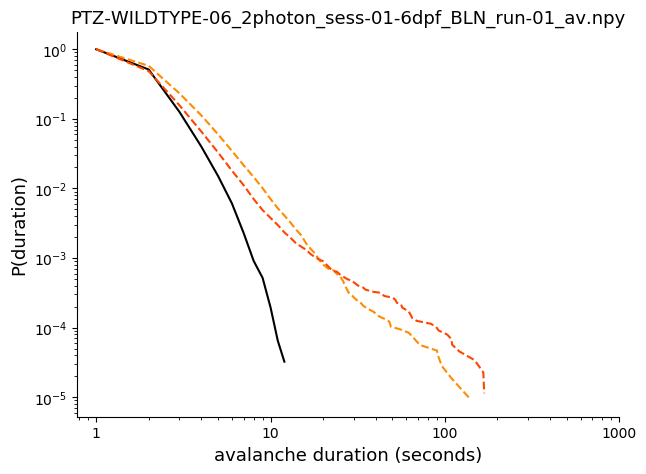

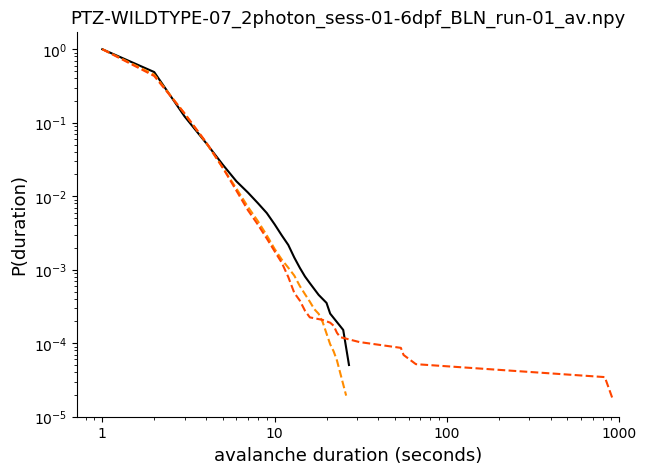

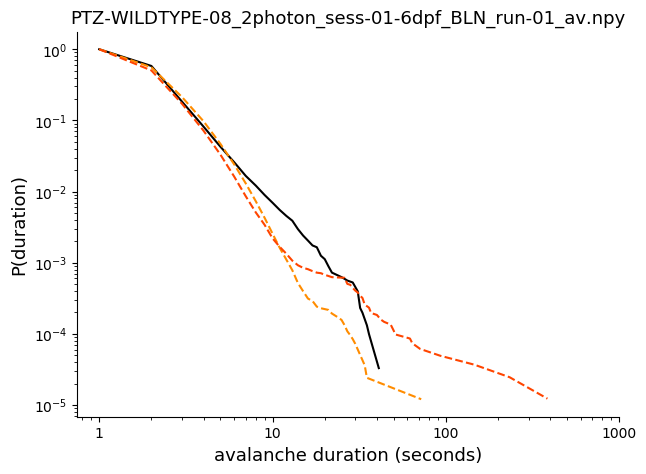

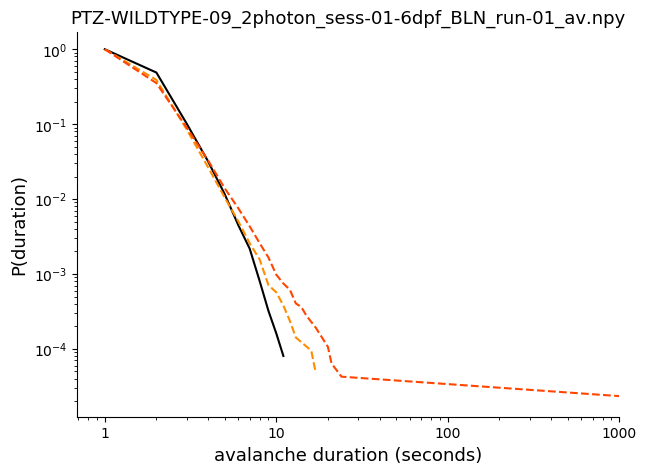

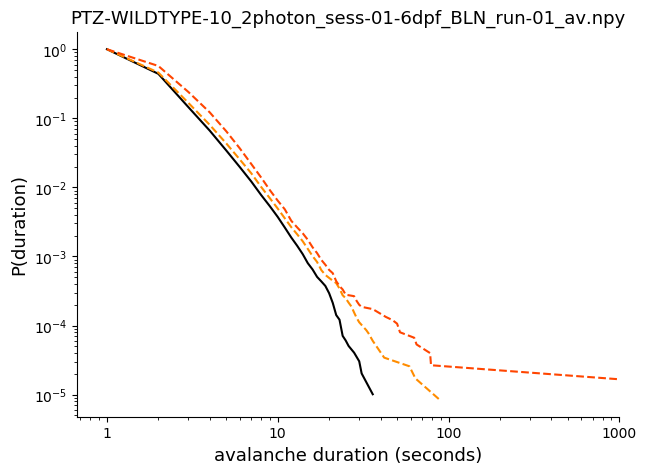

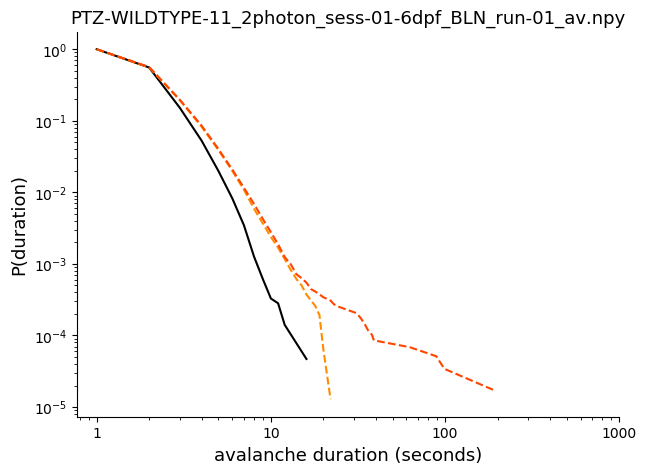

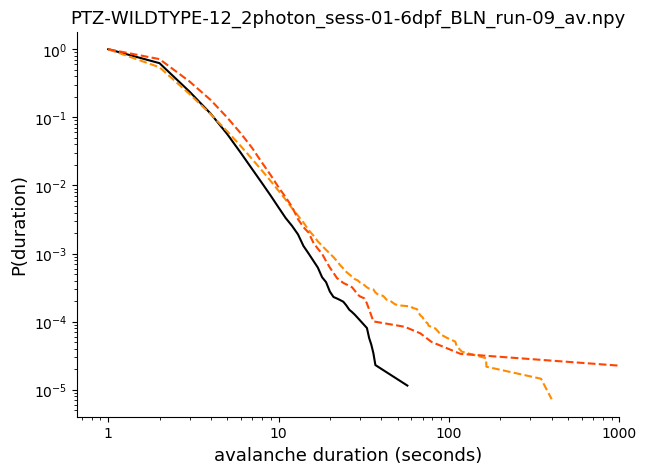

In [5]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'darkorange','orangered']
lines = ['-', '--', '--']
choose=1
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*BLN*_av.npy*'))
    p5list = sorted(glob.glob('*E-' + i + '*PTZ05*_av.npy*'))
    p20list = sorted(glob.glob('*E-' + i + '*PTZ20*_av.npy*'))
    plotlist = [blnlist,p5list,p20list]
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(plotlist)):
        avdistcut = np.load(plotlist[e][0])[choose]
        powerlaw.plot_ccdf(avdistcut, linestyle = lines[e],linewidth =1.5 , markersize = 1, alpha = 1, c = colors[e])
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    plt.xlim(right = 1000)  
    #plt.ylim(bottom = 0.000005)  
    axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(duration)', size = '13')
    axarr.set_xlabel('avalanche duration (seconds)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

## PTZ20 vs nulls

### Exponent - bln - ptz05 - ptz20

### KS distance vs Exponent change - ptz05 - ptz20

## PLOT4
* Branching ratio

In [6]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnbranchlist = sorted(glob.glob('*BLN*branch*'))
p5branchlist = sorted(glob.glob('*PTZ05*branch*'))
p20branchlist = sorted(glob.glob('*PTZ20*branch*'))
blnbranchlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09__branch.npy']

In [7]:
all_list = [blnbranchlist, p5branchlist, p20branchlist]
blist = adfn.list_of_list(3,0)
for t in range(len(blist)):
    for i in range(len(blnbranchlist)):
        blist[t] = np.append(blist[t], np.load(all_list[t][i]))

In [ ]:
import pandas as pd
branchdic = {
  "branch ratio": np.append(np.append(blist[0], blist[1]),blist[2]), "condition": np.append(np.append(adfn.repeat_list('baseline',11),adfn.repeat_list('PTZ 5mM',11)),adfn.repeat_list('PTZ 20mM',11))}
branchdf = pd.DataFrame(branchdic)

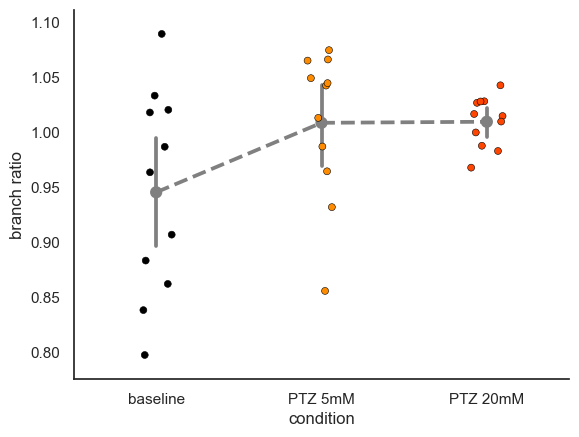

In [47]:
import seaborn as sns
sns.set(style="white")
colors = ['black', 'darkorange','orangered']
ax = sns.stripplot(x="condition", y="branch ratio", data=branchdf, palette = colors, linewidth = 0.4)
ax = sns.pointplot(x="condition", y="branch ratio", data=branchdf, color = 'grey', linestyles = ["--"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

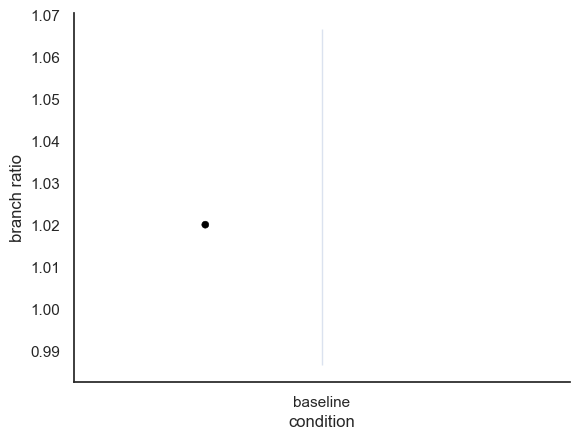

In [54]:
import seaborn as sns
sns.set(style="white")
colors = ['black', 'darkorange','orangered']
ax = sns.stripplot(x="condition", y="branch ratio", data=branchdf[0:3], palette = colors, linewidth = 0.4)
ax = sns.lineplot(x="condition", y="branch ratio",
                  markers=True, dashes=False, data=branchdf[0:3])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [53]:
branchdf[0:3]

,branch ratio,condition
0,0.986667,baseline
1,1.089033,baseline
2,1.020179,baseline
